Synthetisch Time Series - tägl. saisonal 
Von hier: https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34



# Seasonal Series3 (Sinus Seasonality / linear trend with one change / noise)

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df_season = pd.DataFrame(columns=['date', 'sin'])
df_season.date=series
df_season.sin = 1 * np.sin(0.01721420632 * df_season.index + 0) + 1

<AxesSubplot:xlabel='date'>

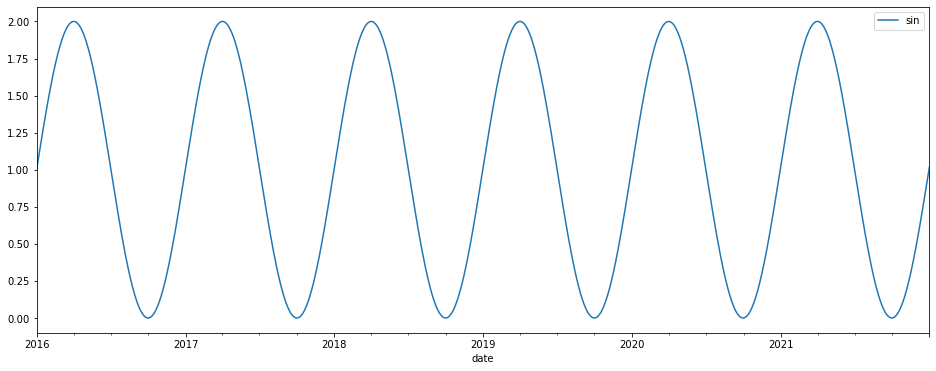

In [3]:
df_season.head()
df_season.plot(y="sin", x="date", figsize=(16,6))

## Daten normalisieren

In [4]:
df_season["sinN"] = (df_season["sin"] - df_season["sin"].min()) / (df_season["sin"].max() - df_season["sin"].min())
df_season.head()

,date,sin,sinN
0,2016-01-01,1.000000,0.500000
1,2016-01-02,1.017213,0.508607
2,2016-01-03,1.034422,0.517211
3,2016-01-04,1.051620,0.525810
4,2016-01-05,1.068802,0.534402


(17167.0, 17531.0)

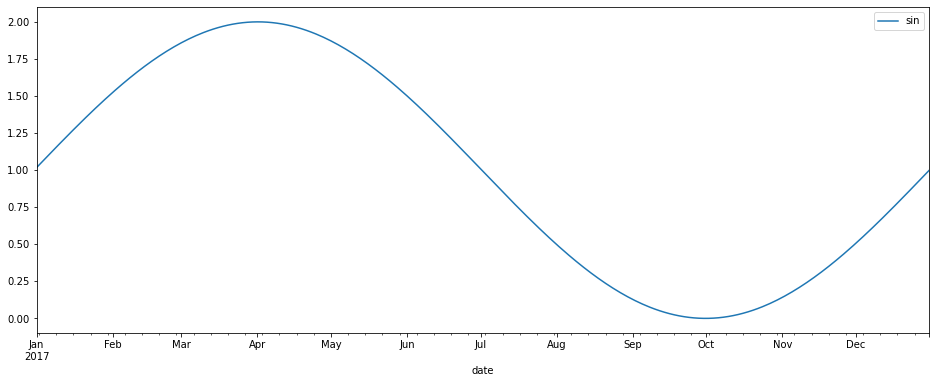

In [5]:
df_season.plot(y="sin", x="date", figsize=(16,6))
plt.xlim('2017-01-01','2017-12-31')

# montly season series

<AxesSubplot:xlabel='date'>

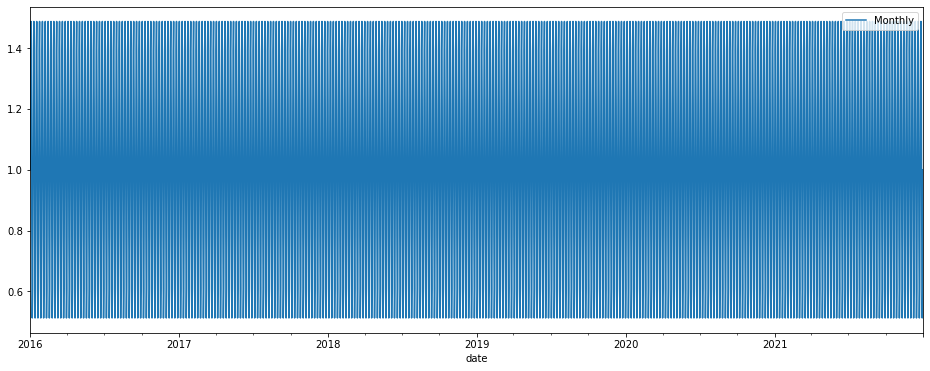

In [6]:
df_month = pd.DataFrame(columns=['date', 'Monthly'])
df_month.date=series
df_month.Monthly = 0.5 * np.sin(0.897597901 * df_season.index + 0) + 1
df_month.plot(y='Monthly', x="date", figsize=(16,6))

### normalisieren

In [7]:
df_month["MonthlyN"] = (df_month["Monthly"] - df_month["Monthly"].min()) / (df_month["Monthly"].max() - df_month["Monthly"].min())
df_month.head()

,date,Monthly,MonthlyN
0,2016-01-01,1.000000,0.500000
1,2016-01-02,1.390916,0.900969
2,2016-01-03,1.487464,1.000000
3,2016-01-04,1.216942,0.722521
4,2016-01-05,0.783058,0.277479


(17532.0, 17562.0)

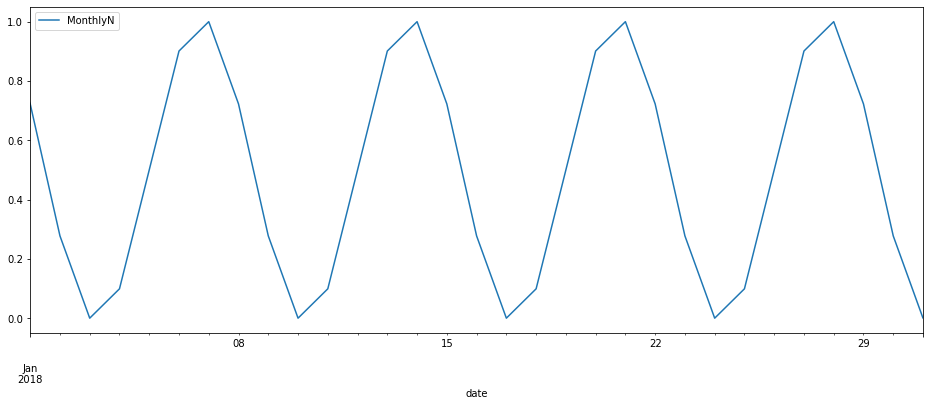

In [9]:
df_month.plot(y='MonthlyN', x="date", figsize=(16,6))
plt.xlim('2018-01-01','2018-01-31')

# Trend Series

### Daten erstellen Trend mit changepoint

In [10]:
df2 = pd.DataFrame(columns=['date', 'trend'])
df2.date=series
print(len(df2))
#df2.head()

2192


In [11]:
df2.loc[0:413,"trend"] = 0 + (-0.1*np.linspace(1,414,414)) +  (-0.01*(np.linspace(1,414,414)**2))
df2.loc[414:1013,"trend"]= -1755 + (0.5*np.linspace(1,600,600)) + (0.1*(np.linspace(1,600,600)**2))
df2.loc[1013:2192,"trend"] = 36179 + (1*np.linspace(1,1179,1179)) + (-0.05*(np.linspace(1,1179,1179)**2))
#df2.loc[814:1327,"trend"] = 328-0.4*np.linspace(1,514,514)
#df2.loc[1328:1828,"trend"] = 122+0.3*np.linspace(1,501,501)
#df2.loc[1829:2192,"trend"] = 272+0.8*np.linspace(1,363,363)
print(df2.head())
print(df2.tail())
print(df2.loc[0:413,"trend"].min())
print(df2.loc[414:1013,"trend"].max())
print(df2.loc[814:1327,"trend"].min())
print(df2.loc[1328:1828,"trend"].max())
df2.head()

        date trend
0 2016-01-01 -0.11
1 2016-01-02 -0.24
2 2016-01-03 -0.39
3 2016-01-04 -0.56
4 2016-01-05 -0.75
           date     trend
2187 2021-12-27 -31677.25
2188 2021-12-28  -31793.8
2189 2021-12-29 -31910.45
2190 2021-12-30  -32027.2
2191 2021-12-31 -32144.05
-1755.3600000000001
36179.95
14525.6
31502.2


,date,trend
0,2016-01-01,-0.11
1,2016-01-02,-0.24
2,2016-01-03,-0.39
3,2016-01-04,-0.56
4,2016-01-05,-0.75


### Daten Normalisieren

In [12]:
df2["trendN"] = (df2["trend"] - df2["trend"].min()) / (df2["trend"].max() - df2["trend"].min())+1
df2.head()

,date,trend,trendN
0,2016-01-01,-0.11,1.470435
1,2016-01-02,-0.24,1.470434
2,2016-01-03,-0.39,1.470431
3,2016-01-04,-0.56,1.470429
4,2016-01-05,-0.75,1.470426


<AxesSubplot:xlabel='date'>

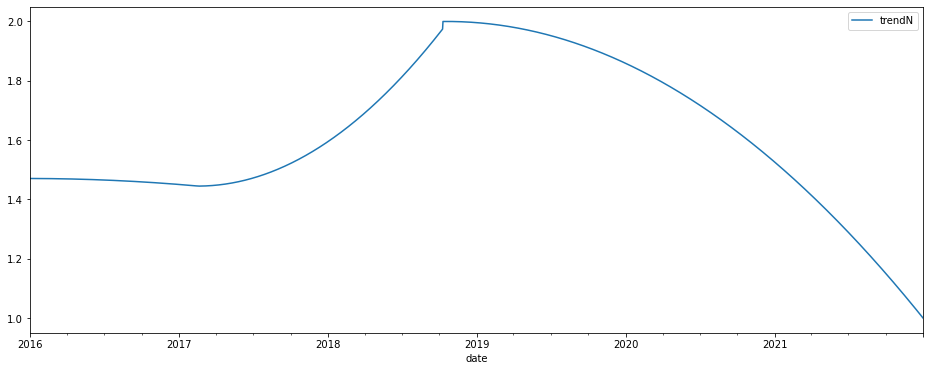

In [13]:
df2.plot(y="trendN", x="date", figsize=(16,6))

# Noise Series

In [14]:
df_noise = pd.DataFrame(columns=['date', 'noise'])
df_noise.date=series
noise = np.random.normal(1,0.2,2192)
df_noise.noise=noise

In [15]:
print(df_noise.head())
print(df_noise['noise'].min())
print(df_noise['noise'].max())

        date     noise
0 2016-01-01  1.220345
1 2016-01-02  1.096483
2 2016-01-03  0.518075
3 2016-01-04  1.374450
4 2016-01-05  0.819840
0.3290815414492947
1.6968876732513016


# 

## normalize

In [96]:
#df_noise['noise'] = (df_noise['noise'] - df_noise['noise'].min()) / (df_noise['noise'].max() - df_noise['noise'].min())

<AxesSubplot:xlabel='date'>

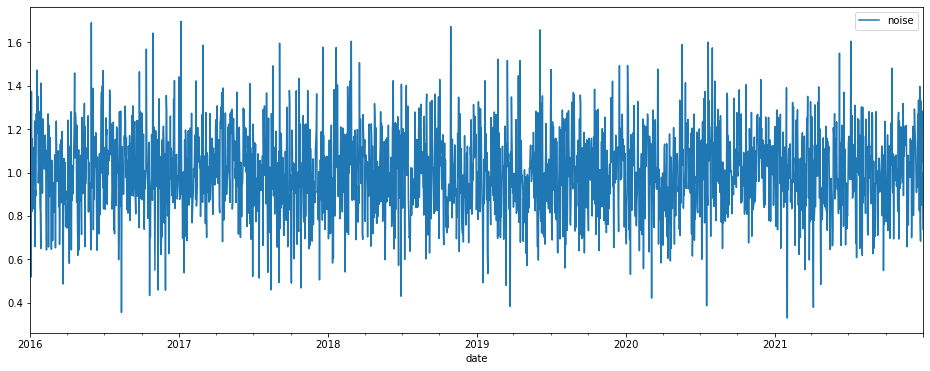

In [16]:
df_noise.plot(y="noise", x="date", figsize=(16,6))

### Additive Model 

In [17]:
df_combination = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_combination.date=series
#df_combination.Sum_TS =df_season["sin"] + df_month["sinM"] + df2["trend"]
#df_combination.Sum_TSN = df_season["sin"] + df_month["sinM"] + df2["trend"] + df_noise['noise']
df_combination.Sum_TSN = df_season["sin"] + df_month["Monthly"] + df2["trendN"] + df_noise['noise'] 
df_combination.head()


,date,Sum_TSN
0,2016-01-01,4.690781
1,2016-01-02,4.975045
2,2016-01-03,4.510392
3,2016-01-04,5.113441
4,2016-01-05,4.142127


<AxesSubplot:xlabel='date'>

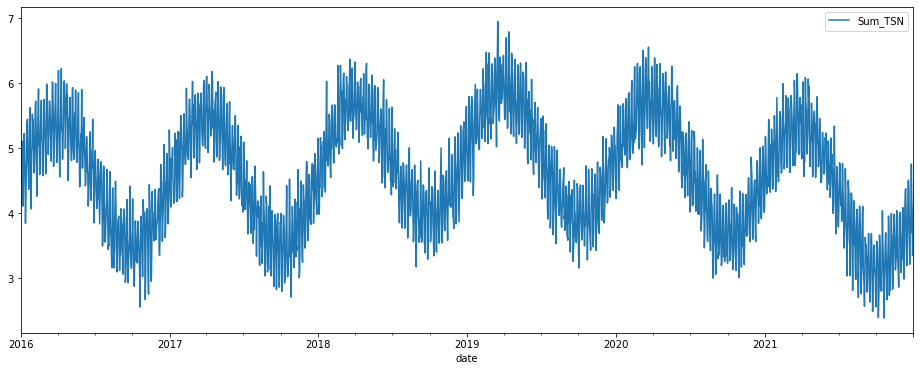

In [18]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

(17532.0, 17896.0)

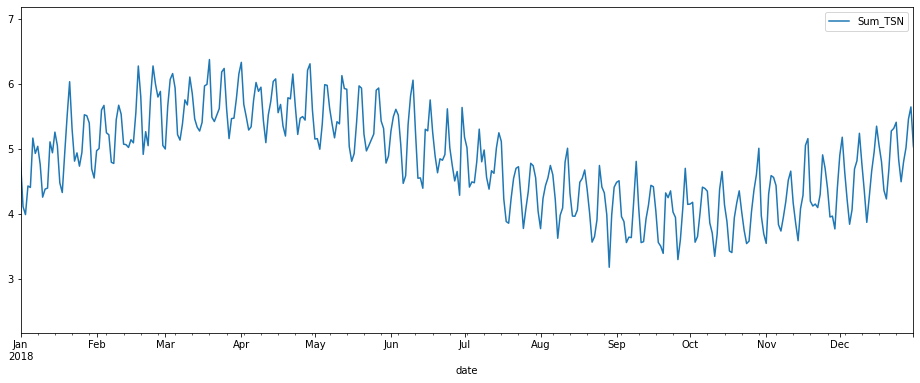

In [19]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))
plt.xlim('2018-01-01','2018-12-31')

## normalize

        date   Sum_TSN
0 2016-01-01  0.504549
1 2016-01-02  0.566778
2 2016-01-03   0.46506
3 2016-01-04  0.597075
4 2016-01-05  0.384443


<AxesSubplot:xlabel='date'>

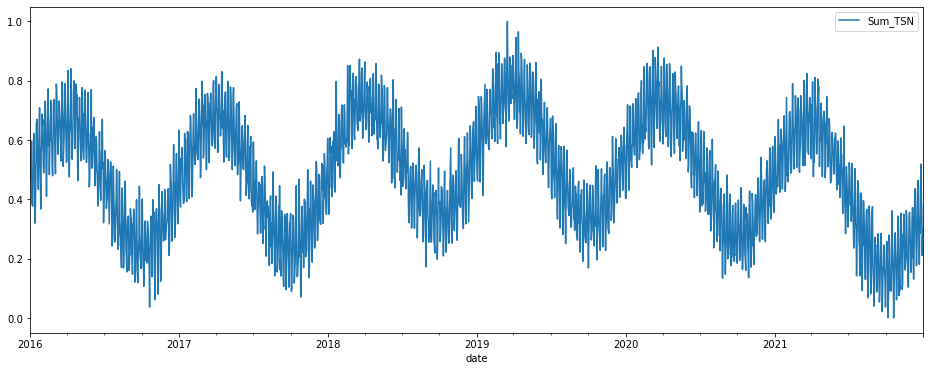

In [20]:
df_combination['Sum_TSN'] = (df_combination['Sum_TSN'] - df_combination['Sum_TSN'].min()) / (df_combination['Sum_TSN'].max() - df_combination['Sum_TSN'].min())
print(df_combination.head())
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [21]:
df_combination.to_csv("series3_weekly_normalized.csv")

# Multiplicative Model

In [22]:
df_multiplicative = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_multiplicative.date=series
#df_multiplicative.Sum_TS = df2["trend"] + df_season["sin"] * df2["trend"] + df_month["sinM"] * df2["trend"]
df_multiplicative.Sum_TSN = df2["trendN"] + df_season["sin"] * df2["trendN"] + df_month["Monthly"] * df2["trendN"] + df_noise['noise'] 
df_multiplicative.head()

,date,Sum_TSN
0,2016-01-01,5.631652
1,2016-01-02,6.10791
2,2016-01-03,5.696766
3,2016-01-04,6.180638
4,2016-01-05,5.01329


<AxesSubplot:xlabel='date'>

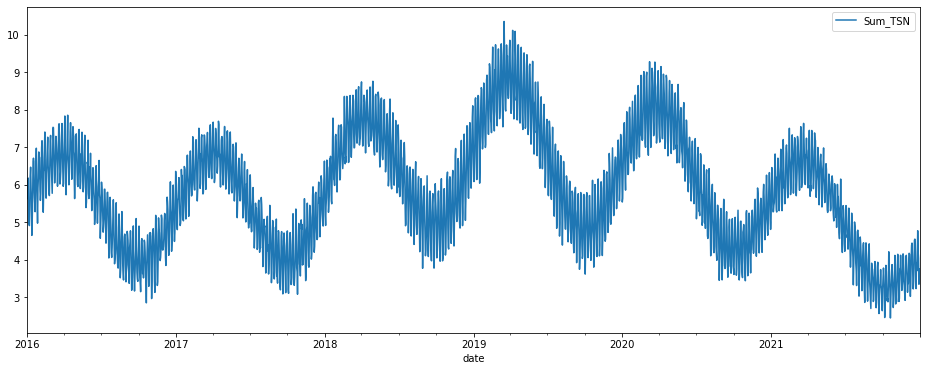

In [23]:
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))

        date   Sum_TSN
0 2016-01-01  0.402355
1 2016-01-02  0.462665
2 2016-01-03    0.4106
3 2016-01-04  0.471875
4 2016-01-05  0.324049


<AxesSubplot:xlabel='date'>

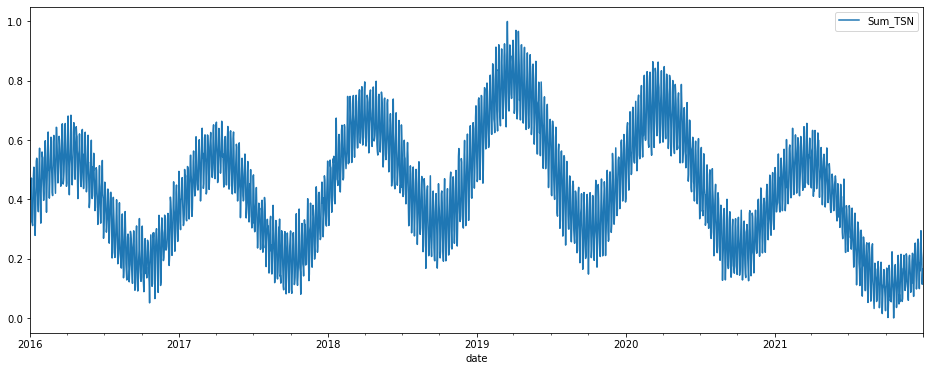

In [24]:
df_multiplicative['Sum_TSN'] = (df_multiplicative['Sum_TSN'] - df_multiplicative['Sum_TSN'].min()) / (df_multiplicative['Sum_TSN'].max() - df_multiplicative['Sum_TSN'].min())
print(df_multiplicative.head())
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [25]:
df_multiplicative.to_csv("series6_weekly_normalized.csv")

In [26]:
df_true = pd.DataFrame(columns=['date', 'trueYaddN', 'trueYmultN','trueYearly','trueYearlyN','trueMonthly', 'trueMonthlyN', 'trueTrend','trueTrendN', 'trueNoise'])

df_true.date = series 

# additive und multiplicative Version der Zeitreihe (normalisiert)
df_true.trueYaddN = df_combination['Sum_TSN']
df_true.trueYmultN=df_multiplicative['Sum_TSN']

# Season. jährlich
df_true.trueYearly = df_season["sin"]
df_true.trueYearlyN = df_season["sinN"]

# Season. monatlich 
df_true.trueMonthly = df_month["Monthly"]
df_true.trueMonthlyN = df_month["MonthlyN"]

# Trend 
df_true.trueTrend=df2["trend"]
df_true.trueTrendN=df2["trendN"]

df_true.trueNoise = df_noise['noise']

df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.504549,0.402355,1.000000,0.500000,1.000000,0.500000,-0.11,1.470435,1.220345
1,2016-01-02,0.566778,0.462665,1.017213,0.508607,1.390916,0.900969,-0.24,1.470434,1.096483
2,2016-01-03,0.46506,0.4106,1.034422,0.517211,1.487464,1.000000,-0.39,1.470431,0.518075
3,2016-01-04,0.597075,0.471875,1.051620,0.525810,1.216942,0.722521,-0.56,1.470429,1.374450
4,2016-01-05,0.384443,0.324049,1.068802,0.534402,0.783058,0.277479,-0.75,1.470426,0.819840


<AxesSubplot:xlabel='date'>

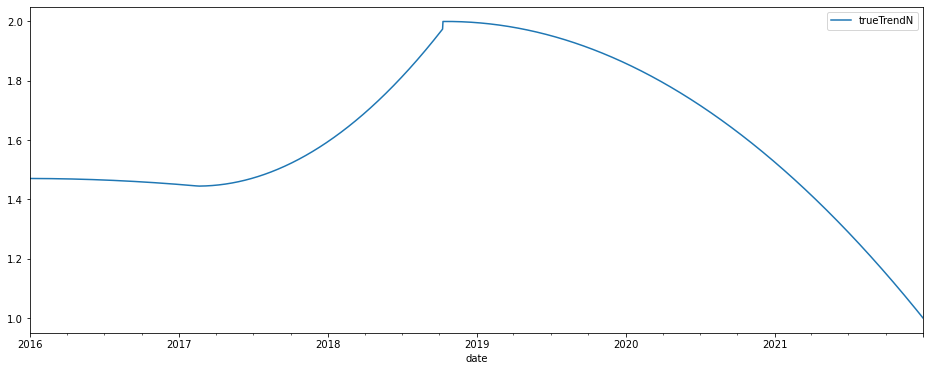

In [27]:
df_true.plot(y="trueTrendN", x="date", figsize=(16,6))

In [28]:
df_true.to_csv("series3_weekly_complete.csv",index=False)